<a href="https://colab.research.google.com/github/dougldavid/vacinacaoCovid/blob/main/An%C3%A1lise_de_dados_de_vacina%C3%A7%C3%A3o_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dados Vacinação do Open DataSUS - Acre

In [ ]:
#!mkdir -p "/content/drive/MyDrive/Estudos, Artigos, Notebooks/Colab Datasets/vacina-covid"  #criando a pasta no diretorio

In [ ]:
#!wget -P "/content/drive/MyDrive/Estudos, Artigos, Notebooks/Colab Datasets/vacina-covid" https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-09-20/uf%3DAC/part-00000-cef8f229-f18f-40fe-9796-546efaa4b13d.c000.csv #baixando o dataset do Open DataSus do estado do Acre

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
vacina_AC = pd.read_csv('/content/drive/MyDrive/Estudos, Artigos, Notebooks/Colab Datasets/vacina-covid/part-00000-cef8f229-f18f-40fe-9796-546efaa4b13d.c000.csv', sep=';')

In [ ]:
vacina_AC.head(10) #visualizando os 10 primeiros registros

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,9a91cdfd-ced5-441b-a544-802d1e205df1-i0b0,5e2b1924d2022c63e6086761986a7098f4226108682d03...,34,1986-09-09,M,99,SEM INFORMACAO,530010.0,10.0,BRASILIA,BRASIL,DF,71730.0,B,6917291,PREFEITURA MUNICIPAL DE RIO BRANCO,DEPARTAMENTO DE VIGILANCIA EPIDEMIOLOGICA E AM...,120040,RIO BRANCO,AC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,EY0575,MINISTERIO DA SAUDE,Organization/00394544000851,2021-07-04,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-07-05T17:53:56.000Z,16341
1,905061d6-832a-443a-83a9-2fca2c687df9-i0b0,23afc2a7e11f06e1ab4d55d14c7df85e0d0f862ef2db46...,66,1954-07-01,M,4,AMARELA,120013.0,10.0,BUJARI,BRASIL,AC,69926.0,B,2002876,SECRETARIA MUNCIPAL DE SAUDE,CENTRO DE SAUDE RAIMUNDA PORFIRIO DE BRITO RAMOS,120013,BUJARI,AC,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210044,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-30,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-31T00:11:39.000Z,16341
2,263c76c8-0b67-4504-815d-6b64d93955b2-i0b0,a64e9d0f885c6f65e82b48e33d7c323fd7816daf8fc2a7...,72,1948-07-10,F,4,AMARELA,120020.0,10.0,CRUZEIRO DO SUL,BRASIL,AC,69980.0,B,2000016,PREFEITURA MUNICIPAL DE RODRIGUES ALVES,UNIDADE BASICA PADRE TEODORO ARNDS,120042,RODRIGUES ALVES,AC,926,Outros,9.0,Trabalhadores de Saúde,4120Z025,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-03-03,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-03-05T13:00:28.000Z,16341
3,ffee0769-db1d-444a-b1f8-6067bc10d1b9-i0b0,c3960e2ec5c770170330605acaf7661254bb0911ce8db7...,31,1989-10-26,M,1,BRANCA,120040.0,10.0,RIO BRANCO,BRASIL,AC,69903.0,B,6917291,PREFEITURA MUNICIPAL DE RIO BRANCO,DEPARTAMENTO DE VIGILANCIA EPIDEMIOLOGICA E AM...,120040,RIO BRANCO,AC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,FA9096,MINISTERIO DA SAUDE,Organization/00394544000851,2021-07-29,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-08-05T16:06:57.000Z,16341
4,64eef0b7-7452-4b02-b773-fce5be0f5286-i0b0,35284d63f7de6da64966487ececdb186f590b538272607...,29,1991-12-24,F,4,AMARELA,120039.0,10.0,PORTO WALTER,BRASIL,AC,69982.0,B,6159087,PREFEITURA MUNICIPAL DE CRUZEIRO DO SUL,SECRETARIA MUNICIPAL DE SAUDE DE CRUZEIRO DO SUL,120020,CRUZEIRO DO SUL,AC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,FA9096,MINISTERIO DA SAUDE,Organization/00394544000851,2021-07-23,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-07-26T15:17:53.000Z,16341
5,4fa45659-5b97-4128-9d46-02166c0dae8e-i0b0,6f8efcc33e41cc750bdb664ffb70bbb9ef397139d65864...,60,1961-06-03,F,4,AMARELA,120030.0,10.0,FEIJO,BRASIL,AC,69960.0,B,7797494,PREFEITURA MUNICIPAL DE FEIJO,U S F FLORINDA VIEIRA DA COSTA,120030,FEIJO,AC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,210277,FUNDACAO BUTANTAN,Organization/61189445000156,2021-07-26,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-08-04T20:52:00.000Z,16341
6,4e03a415-15ca-47f9-92e1-cd8c50fd5a6a-i0b0,e9e7385040cdbf554ffaa4c249970e73087518395a9fea...,20,2001-07-07,F,3,PARDA,120040.0,10.0,RIO BRANCO,BRASIL,AC,NaN,B,6917291,PREFEITURA MUNICIPAL DE RIO BRANCO,DEPARTAMENTO DE VIGILANCIA EPIDEMIOLOGICA E AM...,120040,RIO BRANCO,AC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,FA9096,MINISTERIO DA SAUDE,Organizatio

In [ ]:
vacina_AC.info() #verificando o tipo de dados e variaveis do Dataset, também podemos ver que não há dados nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761387 entries, 0 to 761386
Data columns (total 34 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   document_id                               761387 non-null  object 
 1   paciente_id                               761387 non-null  object 
 2   paciente_idade                            761387 non-null  int64  
 3   paciente_datanascimento                   761387 non-null  object 
 4   paciente_enumsexobiologico                761387 non-null  object 
 5   paciente_racacor_codigo                   761387 non-null  int64  
 6   paciente_racacor_valor                    761387 non-null  object 
 7   paciente_endereco_coibgemunicipio         756745 non-null  float64
 8   paciente_endereco_copais                  756755 non-null  float64
 9   paciente_endereco_nmmunicipio             756754 non-null  object 
 10  paciente_endereco_nm

In [ ]:
#vacina_AC.describe(include='all') #parametro all não exclui ngm


##Analise Exploratoria de Dados

Análise de vacina Sexo biólógico x idade dos pacientes

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


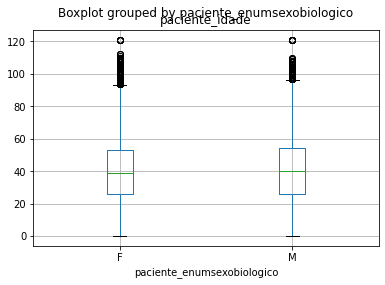

In [ ]:
%matplotlib inline
vacina_AC.boxplot(column='paciente_idade', by = 'paciente_enumsexobiologico') 
#Box plot analisando a idade dos pacientes x sexo 
#Notamos que o valor minimo é 0 ou seja, no nosso gráfico já conseguimos observar que temos pessoas com idade = 0 em ambos os sexos que tomaram vacina, vale checar se esse dado está correto ou foi preenchido erroneamente
#temos alguns outliers com idades proximas a 90 e um deles se destacando com idade superior a 120


Analise do box-plot acima idade x sexo 

 

*  Notamos que o valor minimo é 0 ou seja, no nosso gráfico já conseguimos  observar que temos pessoas com idade = 0 em ambos os sexos que tomaram vacina, vale checar se esse dado foi preenchido de forma equivocada
*   A nossa mediana(valor que divide a amostra que estamos analisando 50% da base) no sexo feminino é exatamente 40 anos e masculina bem proxima também de 40


*   Outro ponto importante é que em ambas as idades 75% do dataset, está entre 0 e próximo a 60 ali temos a maior concentração de pessoas vacinadas naquela idade, os outros 25% estão distribuidos entre 60 e 120 onde a cauda é bem longa
*   E por fim temos alguns outliers com idades proxima a 90 e um deles se destacando com idade de 120 anos, vale também avaliar se é um dado preenchido de forma errada ou realmente as pessoas possuem essa idade. 







In [ ]:
vacina_AC[vacina_AC.paciente_idade > 119] #valores acima de 119 idade, vale a pena checar veja a data de nascimento em todos é a mesma

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
91900,b73caf21-ebbf-4248-aad9-348f134912a7-i0b0,1e8e68a7ed05d758408ee1e33cf8132f320dc6c276a775...,121,1899-12-30,F,99,SEM INFORMACAO,120010.0,10.0,BRASILEIA,BRASIL,AC,69932.0,B,2001349,PREFEITURA MUNICIPAL DE BRASILEIA,ESF TUFIC MIZAEL SAADY,120010,BRASILEIA,AC,926,Outros,9.0,Trabalhadores de Saúde,4120Z004,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-04,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-02-08T16:21:41.000Z,16341
222871,d176db5e-a04b-4ce7-babf-0cc32cff6961-i0b0,2430dc66b4c9cb1a0874806a9248971931e6ecd707dc05...,121,1899-12-30,M,99,SEM INFORMACAO,120050.0,10.0,SENA MADUREIRA,BRASIL,AC,69940.0,B,2001349,PREFEITURA MUNICIPAL DE BRASILEIA,ESF TUFIC MIZAEL SAADY,120010,BRASILEIA,AC,923,Técnico de Enfermagem,9.0,Trabalhadores de Saúde,210040,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-11,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-17T19:43:08.000Z,16341
297510,f7472f58-351a-424d-b9e3-d8044d508cbd-i0b0,2430dc66b4c9cb1a0874806a9248971931e6ecd707dc05...,121,1899-12-30,M,99,SEM INFORMACAO,120050.0,10.0,SENA MADUREIRA,BRASIL,AC,69940.0,B,2001349,PREFEITURA MUNICIPAL DE BRASILEIA,ESF TUFIC MIZAEL SAADY,120010,BRASILEIA,AC,923,Técnico de Enfermagem,9.0,Trabalhadores de Saúde,202010041,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-04,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-08T15:22:11.000Z,16341
378616,9c858a48-e77f-468a-95cf-2ac86334bf46-i0b0,9b29dca65cc1e8a480a5a9b6f74c96b6362023261ff15f...,121,1899-12-30,F,99,SEM INFORMACAO,120010.0,10.0,BRASILEIA,BRASIL,AC,69932.0,B,2001349,PREFEITURA MUNICIPAL DE BRASILEIA,ESF TUFIC MIZAEL SAADY,120010,BRASILEIA,AC,926,Outros,9.0,Trabalhadores de Saúde,210052A,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-20,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-05-03T02:24:41.000Z,16341
388552,ff0e59d4-2bb4-408a-a468-a62816a6072f-i0b0,6db46cb04c9b405ecd7c775ef45a0c166510fa4b01cfbc...,121,1899-12-30,M,99,SEM INFORMACAO,120025.0,10.0,EPITACIOLANDIA,BRASIL,AC,69934.0,B,2001349,PREFEITURA MUNICIPAL DE BRASILEIA,ESF TUFIC MIZAEL SAADY,120010,BRASILEIA,AC,926,Outros,9.0,Trabalhadores de Saúde,4120Z004,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-04,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-02-08T14:53:20.000Z,16341
428982,0734f0fe-df64-4e70-9e70-17156f581500-i0b0,be3b5608876f0054faad04da0e487b6d5235cbd7939c88...,121,1899-12-30,M,99,SEM INFORMACAO,120010.0,10.0,BRASILEIA,BRASIL,AC,69932.0,B,2001349,PREFEITURA MUNICIPAL DE BRASILEIA,ESF TUFIC MIZAEL SAADY,120010,BRASILEIA,AC,907,Enfermeiro(a),9.0,Trabalhadores de Saúde,202010041,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-22,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-12T13:04:28.000Z,16341
444165,628f7c61-e08c-4162-8ca5-5dc23e6daa19-i0b0,137d7a80d4bb0aa2dd07088344e22fcbfaa92df32add89...,121,1899-12-30,F,99,SEM INFORMACAO,120050.0,10.0,SENA MADUREIRA,BRASIL,AC,69940.0,B,2001349,PREFEITURA MUNICIPAL DE BRASILEIA,ESF TUFIC MIZAEL SAADY,120010,BRASILEIA,AC,907,Enfermeiro(a),9.0,Trabalhadores de Saúde,202010041,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-18,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-1

In [ ]:
vacina_AC[vacina_AC.paciente_idade == 0]  #pacintes com idade 0 

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
99440,7d508082-4442-4ce5-bf31-7d7ebf151971-i0b0,34c7e113cd38620d76fa0770c85f45de8c110585afb627...,0,2021-04-05,M,3,PARDA,120080.0,10.0,PORTO ACRE,BRASIL,AC,69927.0,B,3323307,PREFEITURA MUNICIPAL DE PORTO ACRE,UNIDADE DE SAUDE DA FAMILIA ALVARO ARAUJO NOBRE,120080,PORTO ACRE,AC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,4120Z025,SINOVAC LIFE SCIENCE CO LTD,NaN,2021-04-05,1ª Dose,85,Vacina Covid-19 - Covishield,ESUS APS - NACIONAL (OFFLINE),2021-05-20T10:00:01.000Z,18602
190264,b474ec48-57a8-49ff-93e2-6ffa471c1c08-i0b0,c245ae23ed400b6f2f9b2f70337a617ece70712ef6ad55...,0,2020-02-26,M,3,PARDA,120030.0,10.0,FEIJO,BRASIL,AC,69960.0,B,2000040,PREFEITURA MUNICIPAL DE FEIJO,CENTRO DE SAUDE DIAMANTINO MACEDO,120030,FEIJO,AC,0,NaN,NaN,NaN,188VFA066Z,SERUM INSTITUTE OF INDIA LTD,NaN,2021-02-15,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-02-20T01:31:42.000Z,18602
243403,12225fb2-c4b2-4d64-8812-dbb88169e67e-i0b0,4bb060ca3b3da2444016e8cf347fc25db0aa2777eb573a...,0,2020-04-03,M,5,INDIGENA,120020.0,10.0,CRUZEIRO DO SUL,BRASIL,AC,NaN,B,6748759,DISTRITO SANITARIO ESPECIAL INDIGENA ALTO RIO ...,POLO BASE DE FEIJO,120030,FEIJO,AC,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010040,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-03,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-09T20:27:16.000Z,16341
553153,6519c811-db94-4358-bc91-c71a4173466d-i0b0,d4e47265d1ca3c7d42ecafd02053e9780bd5698cb4543e...,0,2020-11-25,F,99,SEM INFORMACAO,120025.0,10.0,EPITACIOLANDIA,BRASIL,AC,NaN,B,2001314,PREFEITURA MUNICIPAL DE EPITACIOLANDIA,ESF JOAO ALVES DA SILVA,120025,EPITACIOLANDIA,AC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,213VCD010W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-06-10,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-06-11T13:57:41.000Z,16341


In [ ]:
vacina_AC_count = vacina_AC.groupby(['paciente_idade', 'paciente_enumsexobiologico' ]).count().reset_index()
vacina_AC_count

,paciente_idade,paciente_enumsexobiologico,document_id,paciente_id,paciente_datanascimento,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,0,F,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,M,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,2,2,2,3,3,1,3,3,3,3,3,3,3
2,1,F,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,M,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2
4,2,M,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,110,M,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
213,111,F,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
214,112,F,3,3,3,3,3,3,3,3,3,3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
215,121,F,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [ ]:
vacina_AC_count_M =  vacina_AC_count[vacina_AC_count.paciente_enumsexobiologico == 'M']
vacina_AC_count_F =  vacina_AC_count[vacina_AC_count.paciente_enumsexobiologico == 'F']


Text(0, 0.5, 'Pacientes')

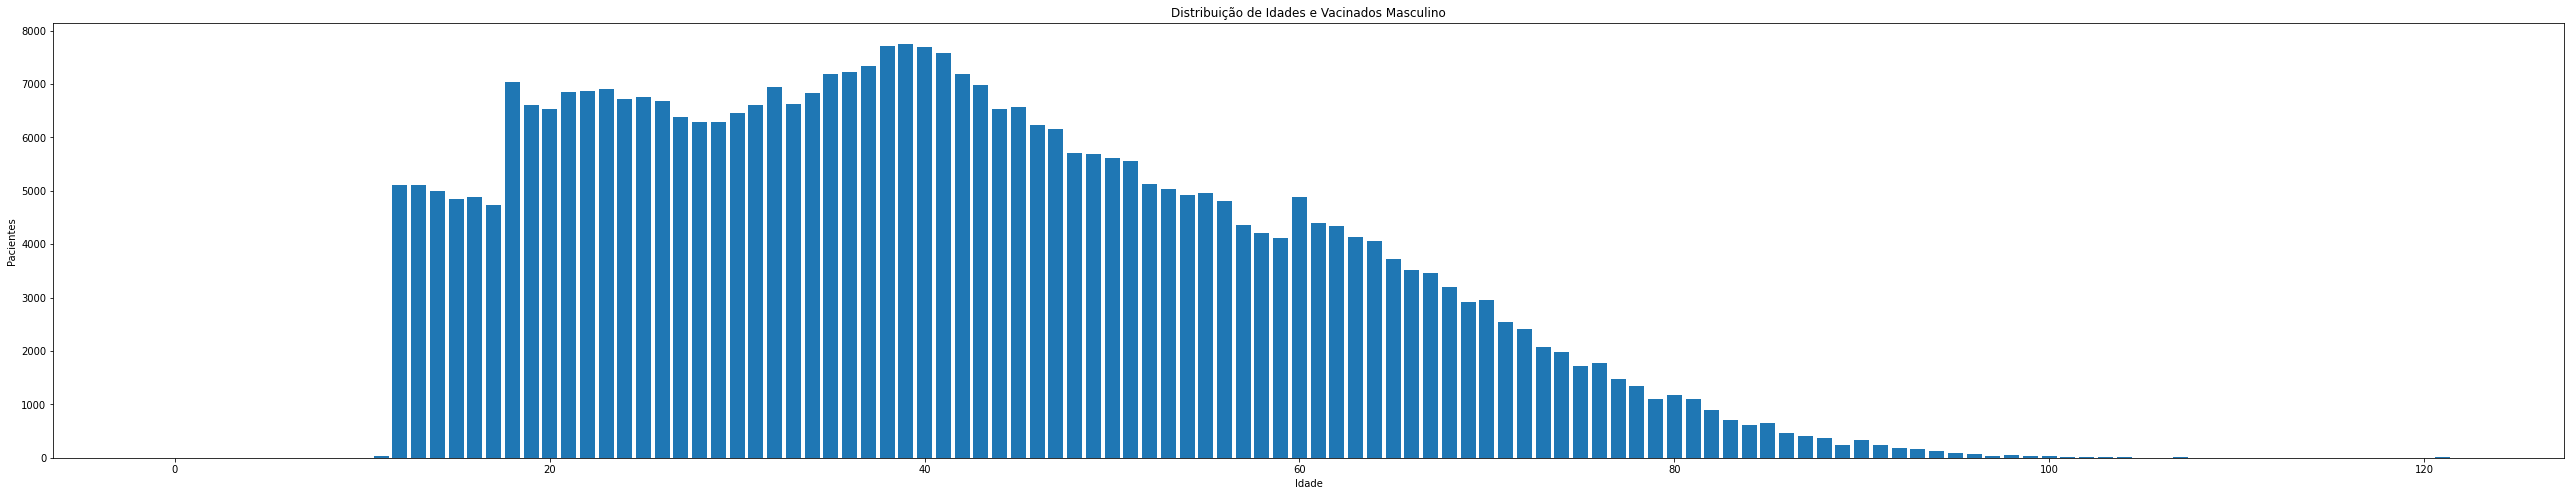

In [ ]:
#Gráfico com a distribuição de Homens vacinados por idade, de fato a grande maioria está entre 20 e 60 anos
plt.figure(figsize=(45, 8))
plt.bar(vacina_AC_count_M.paciente_idade, vacina_AC_count_M.document_id)
plt.title('Distribuição de Idades e Vacinados Masculino')
plt.xlabel('Idade')
plt.ylabel('Pacientes')


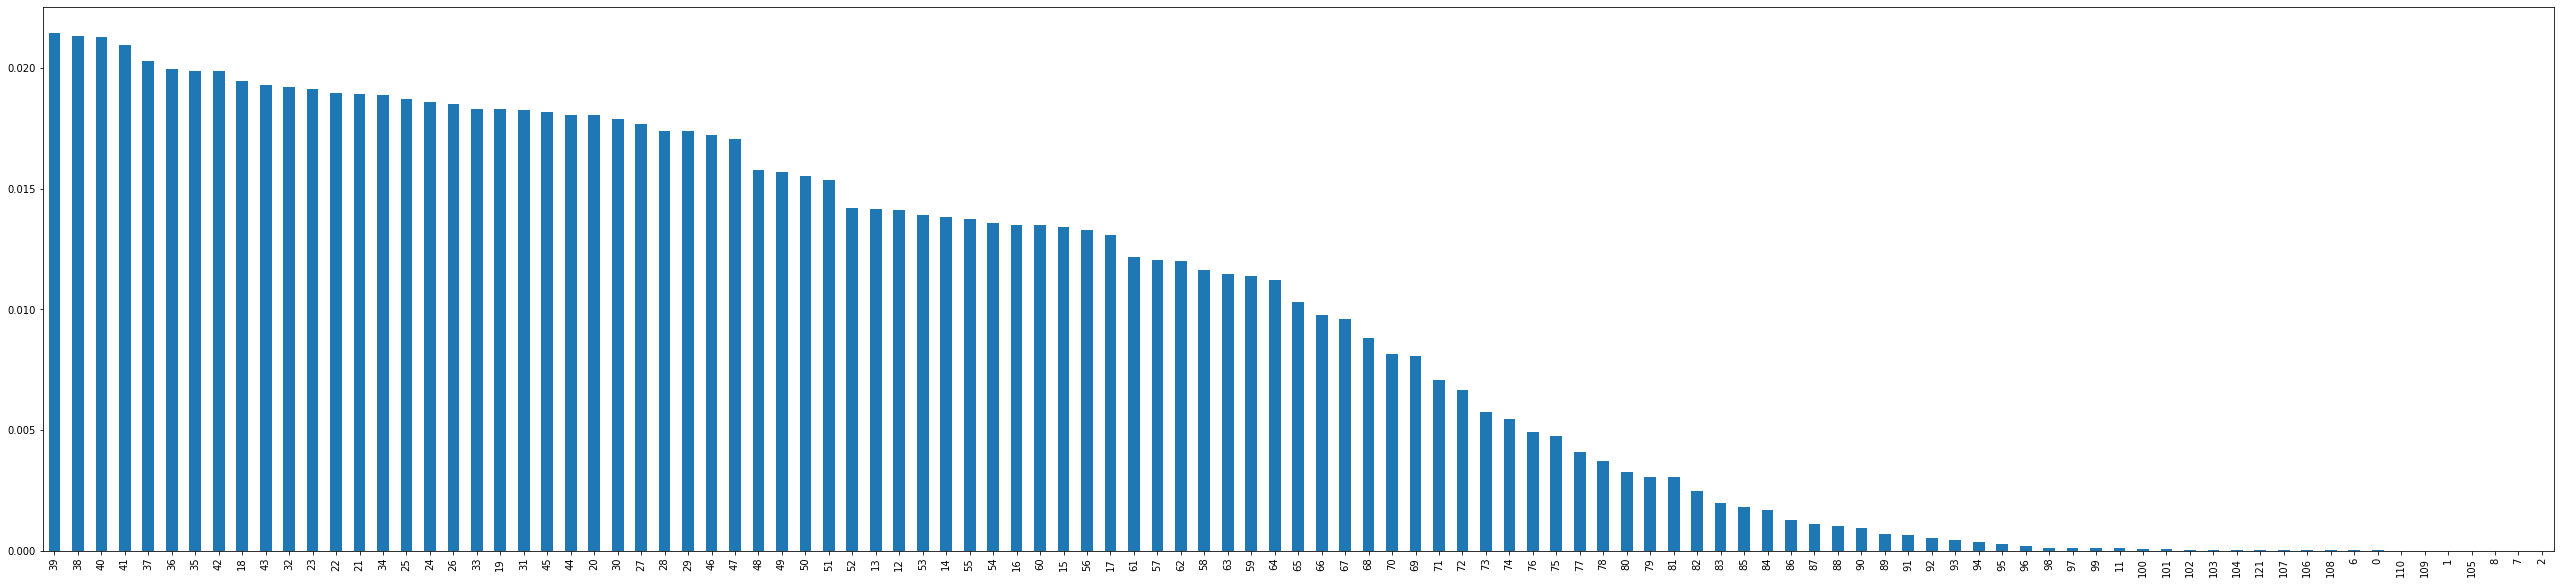

In [ ]:
#uma outra visão de dsitribuição essa por porcentagem x idade
plt.figure(figsize=(45, 10))
vacina_AC_m = vacina_AC[vacina_AC.paciente_enumsexobiologico == 'M'] 
vacina_AC_m.paciente_idade.value_counts(normalize=True).plot(kind='bar')

Text(0, 0.5, 'Pacientes')

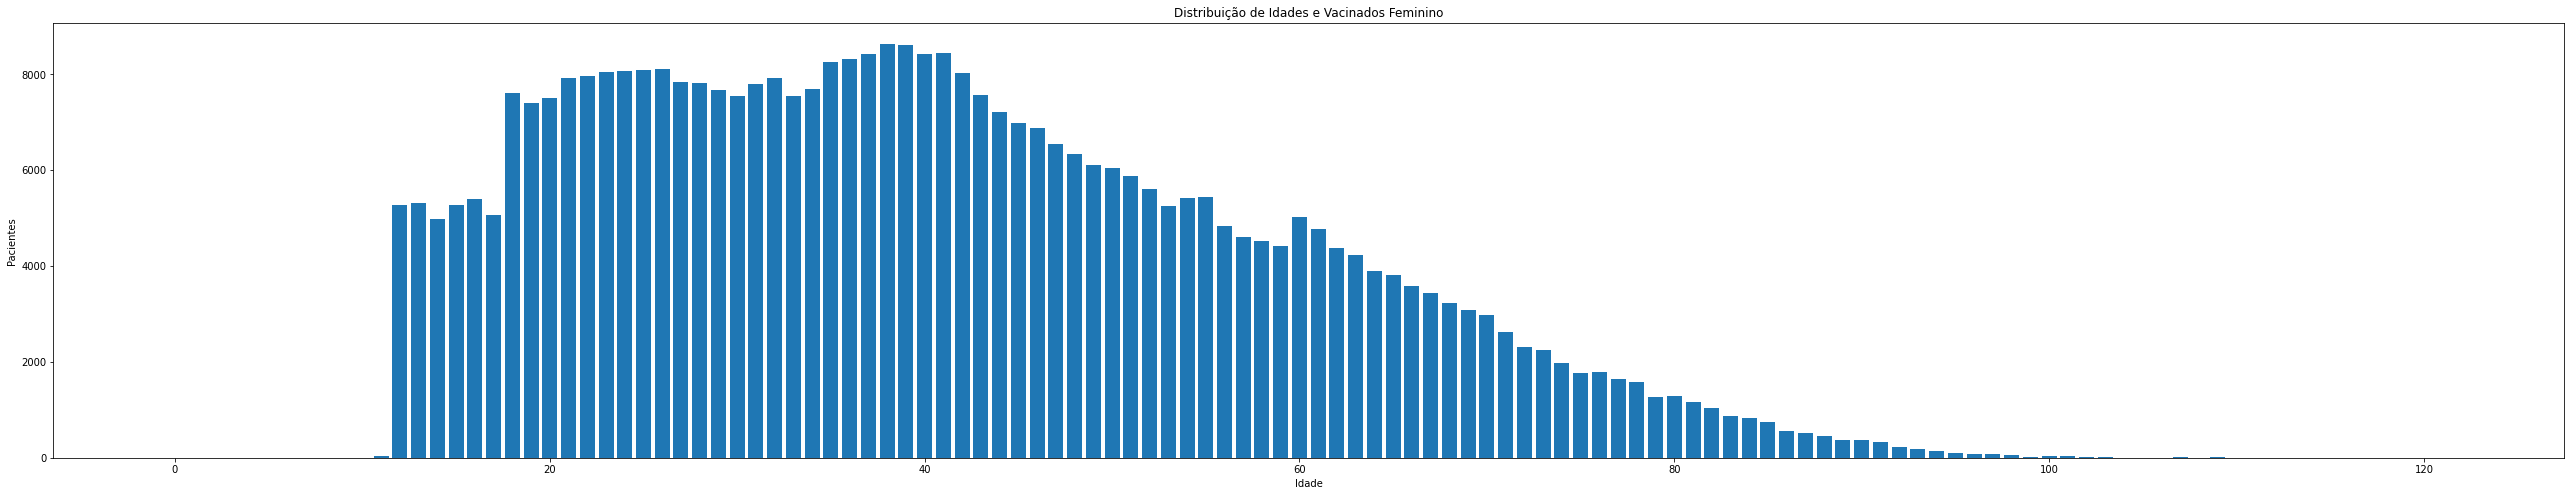

In [ ]:
#Gráfico com a distribuição de Homens vacinados por idade, de fato a grande maioria está entre 20 e 60 anos a distribuição bem parecida com a masculina um pouco maior dos 20 aos 40 anos
plt.figure(figsize=(45, 8))
plt.bar(vacina_AC_count_F.paciente_idade, vacina_AC_count_F.document_id)
plt.title('Distribuição de Idades e Vacinados Feminino')
plt.xlabel('Idade')
plt.ylabel('Pacientes')
#

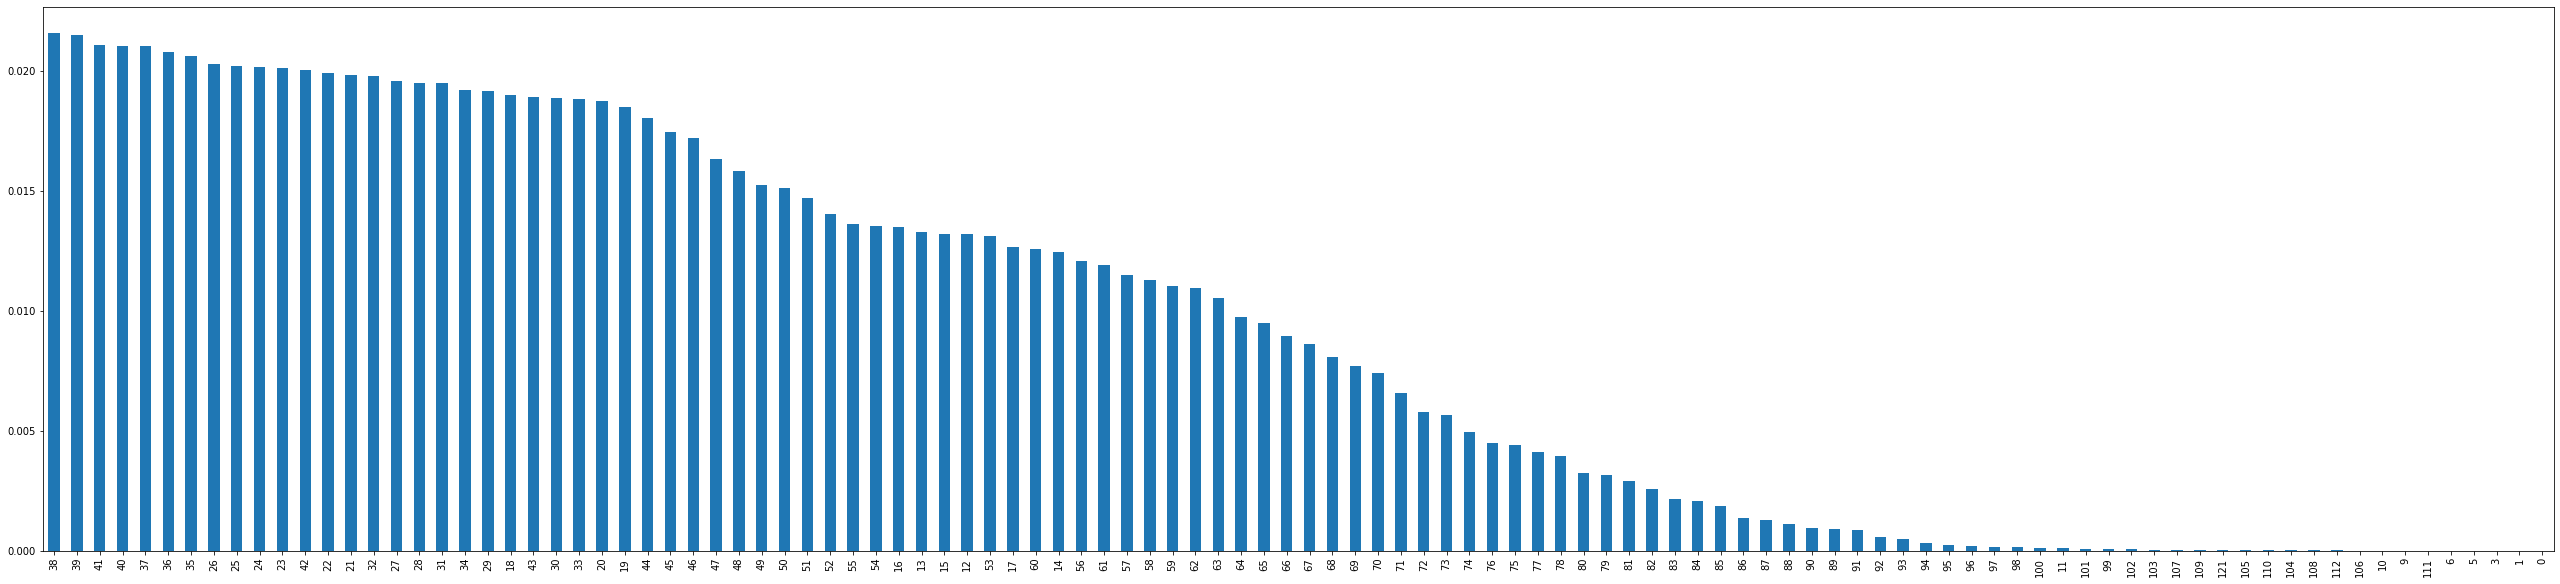

In [ ]:
#uma outra visão de dsitribuição essa por porcentagem x idade
plt.figure(figsize=(45, 10))
vacina_AC_f = vacina_AC[vacina_AC.paciente_enumsexobiologico == 'F'] 
vacina_AC_f.paciente_idade.value_counts(normalize=True).plot(kind='bar')

Análise das pessoas que tomaram segunda dose

In [ ]:
vacina_AC.head(5)

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,9a91cdfd-ced5-441b-a544-802d1e205df1-i0b0,5e2b1924d2022c63e6086761986a7098f4226108682d03...,34,1986-09-09,M,99,SEM INFORMACAO,530010.0,10.0,BRASILIA,BRASIL,DF,71730.0,B,6917291,PREFEITURA MUNICIPAL DE RIO BRANCO,DEPARTAMENTO DE VIGILANCIA EPIDEMIOLOGICA E AM...,120040,RIO BRANCO,AC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,EY0575,MINISTERIO DA SAUDE,Organization/00394544000851,2021-07-04,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-07-05T17:53:56.000Z,16341
1,905061d6-832a-443a-83a9-2fca2c687df9-i0b0,23afc2a7e11f06e1ab4d55d14c7df85e0d0f862ef2db46...,66,1954-07-01,M,4,AMARELA,120013.0,10.0,BUJARI,BRASIL,AC,69926.0,B,2002876,SECRETARIA MUNCIPAL DE SAUDE,CENTRO DE SAUDE RAIMUNDA PORFIRIO DE BRITO RAMOS,120013,BUJARI,AC,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210044,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-30,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-31T00:11:39.000Z,16341
2,263c76c8-0b67-4504-815d-6b64d93955b2-i0b0,a64e9d0f885c6f65e82b48e33d7c323fd7816daf8fc2a7...,72,1948-07-10,F,4,AMARELA,120020.0,10.0,CRUZEIRO DO SUL,BRASIL,AC,69980.0,B,2000016,PREFEITURA MUNICIPAL DE RODRIGUES ALVES,UNIDADE BASICA PADRE TEODORO ARNDS,120042,RODRIGUES ALVES,AC,926,Outros,9.0,Trabalhadores de Saúde,4120Z025,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-03-03,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-03-05T13:00:28.000Z,16341
3,ffee0769-db1d-444a-b1f8-6067bc10d1b9-i0b0,c3960e2ec5c770170330605acaf7661254bb0911ce8db7...,31,1989-10-26,M,1,BRANCA,120040.0,10.0,RIO BRANCO,BRASIL,AC,69903.0,B,6917291,PREFEITURA MUNICIPAL DE RIO BRANCO,DEPARTAMENTO DE VIGILANCIA EPIDEMIOLOGICA E AM...,120040,RIO BRANCO,AC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,FA9096,MINISTERIO DA SAUDE,Organization/00394544000851,2021-07-29,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-08-05T16:06:57.000Z,16341
4,64eef0b7-7452-4b02-b773-fce5be0f5286-i0b0,35284d63f7de6da64966487ececdb186f590b538272607...,29,1991-12-24,F,4,AMARELA,120039.0,10.0,PORTO WALTER,BRASIL,AC,69982.0,B,6159087,PREFEITURA MUNICIPAL DE CRUZEIRO DO SUL,SECRETARIA MUNICIPAL DE SAUDE DE CRUZEIRO DO SUL,120020,CRUZEIRO DO SUL,AC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,FA9096,MINISTERIO DA SAUDE,Organization/00394544000851,2021-07-23,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-07-26T15:17:53.000Z,16341


In [ ]:
#Validando se temos pessoas com dois identificadores de documentos
vacina_AC_personal = vacina_AC.groupby(['paciente_id']).document_id.nunique()
vacina_AC_personal[vacina_AC_personal > 1]



paciente_id
0000909749768604564109b74859f52f1b5205c23a46390f73dd99de68ab0b7a    2
0000bd36aa00568e159d41cd00fc28d4f98526608cfd7b136e50316b1295d2c4    2
0000de8c2bca03162620bda39006f6f9a5d8113513375596ff8001d974bcd4d4    2
00013ad9ed30f816a9a4f59d716dd2a569f74683b81e0057f076405d48016967    2
000161f4ab4b825c96638175f2525e6c18c1c57c65b5303e4adc0739ca017e2e    2
                                                                   ..
ffff4df12cee39e48c5ec75a819f6c55101de212ec35ddb4f83fe3465708dda8    2
ffff78015eed1241a25237b8e10772dbc88457d7eef5a5ca0e5e992e6e61dcd3    2
ffffbec8c675da566b35be11f99930f013cd37e0ad94b02678b9426a0b89a2fe    2
ffffddcb475ac222464390e93d36750d4f50e75c6476140ab83f6efed2c01adf    2
fffff74ca08f138db89f56e93f02a73f7a5bf380683ef289ad3615f34c60a39a    2
Name: document_id, Length: 235402, dtype: int64

In [ ]:
#como exibido acima, temos pessoas que possuem dois identificadores de documentos é valido toda e qualquer analise por pessoa ser feita pela variavel paciente_id, visto que aparenta ser o identificador confiavel 
#Quando estamos tirando insights referente a pessoa, assim garantimos que estamos falando do mesmo individuo
vacina_AC[vacina_AC.paciente_id == '0000bd36aa00568e159d41cd00fc28d4f98526608cfd7b136e50316b1295d2c4']

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
458366,a3d436ae-0210-4f8c-a259-4e5144931713-i0b0,0000bd36aa00568e159d41cd00fc28d4f98526608cfd7b...,41,1979-07-15,M,2,PRETA,120060.0,10.0,TARAUACA,BRASIL,AC,69970.0,B,2000156,PREFEITURA MUNICIPAL DE TARAUACA,UNIDADE BASICA DE SAUDE JOAO WANDERLEI,120060,TARAUACA,AC,107,Hipertensão de difícil controle ou com complic...,1.0,Comorbidades,213VCD027Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-17,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-27T20:22:53.000Z,16341
550767,559b1e23-9fa1-47c0-aaf3-2a84d0de03c1-i0b0,0000bd36aa00568e159d41cd00fc28d4f98526608cfd7b...,42,1979-07-15,M,2,PRETA,120060.0,10.0,TARAUACA,BRASIL,AC,69970.0,B,3810771,PREFEITURA MUNICIPAL DE TARAUACA,UNIDADE DE S DA FAMILIA DR JOSE LEONCIO GOMES ...,120060,TARAUACA,AC,107,NaN,NaN,NaN,214VCD056W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-08-12,2ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-08-20T13:50:32.000Z,16341


In [ ]:
#Validand0 se temos dois documentos e identificadores iguais, onde o contrário não temos ou seja qualquer metrica por pessoa vale ser feita por  paciente_id
vacina_AC_personal = vacina_AC.groupby(['document_id']).paciente_id.nunique()
vacina_AC_personal[vacina_AC_personal > 1]

Series([], Name: paciente_id, dtype: int64)

In [ ]:
teste = (
    vacina_AC
    .query ('paciente_enumsexobiologico == "M"')
    .query ('paciente_idade == "0"')
   
) 
teste.head(3)

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
99440,7d508082-4442-4ce5-bf31-7d7ebf151971-i0b0,34c7e113cd38620d76fa0770c85f45de8c110585afb627...,0,2021-04-05,M,3,PARDA,120080.0,10.0,PORTO ACRE,BRASIL,AC,69927.0,B,3323307,PREFEITURA MUNICIPAL DE PORTO ACRE,UNIDADE DE SAUDE DA FAMILIA ALVARO ARAUJO NOBRE,120080,PORTO ACRE,AC,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,4120Z025,SINOVAC LIFE SCIENCE CO LTD,NaN,2021-04-05,1ª Dose,85,Vacina Covid-19 - Covishield,ESUS APS - NACIONAL (OFFLINE),2021-05-20T10:00:01.000Z,18602
190264,b474ec48-57a8-49ff-93e2-6ffa471c1c08-i0b0,c245ae23ed400b6f2f9b2f70337a617ece70712ef6ad55...,0,2020-02-26,M,3,PARDA,120030.0,10.0,FEIJO,BRASIL,AC,69960.0,B,2000040,PREFEITURA MUNICIPAL DE FEIJO,CENTRO DE SAUDE DIAMANTINO MACEDO,120030,FEIJO,AC,0,NaN,NaN,NaN,188VFA066Z,SERUM INSTITUTE OF INDIA LTD,NaN,2021-02-15,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-02-20T01:31:42.000Z,18602
243403,12225fb2-c4b2-4d64-8812-dbb88169e67e-i0b0,4bb060ca3b3da2444016e8cf347fc25db0aa2777eb573a...,0,2020-04-03,M,5,INDIGENA,120020.0,10.0,CRUZEIRO DO SUL,BRASIL,AC,NaN,B,6748759,DISTRITO SANITARIO ESPECIAL INDIGENA ALTO RIO ...,POLO BASE DE FEIJO,120030,FEIJO,AC,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010040,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-03,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-09T20:27:16.000Z,16341
